<a href="https://colab.research.google.com/github/Chandan2597/Airbnb-Booking-Analysis/blob/main/AirBnb_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name: AirBnb Booking Analysis Exploratory Data Analysis**


*   **Project Type** : EDA
*   **Project Contribution** : Individual



##**Description**

###Project Summary
Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. \\
This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. We will explore and analyse the data to discover key understandings.

###Problem Statement

**Let's explore and analyze the dataset to gain some insights(a few problems listed below)** \\


1.   Neighbourhood groups based on latitude and longitude?
2.   What can we learn about different hosts and neighbourhood groups?
3.   Top 10 neighbourhood groups with room type having highest room prices?
4.   What can we learn from Room types and neighbourhood groups?
5.   Room type vs price on different neighbourhood group?
6.   On an average how many nights people stayed in each room type?
7.   How monthly reviews varies with room type in each neighbourhood group?
8.   Room types and their relation with availability in different neighbourhood group.
9.   Top 5 Location with highest review?
10.  Number of reviews vs price?
11. What is the Correlation between different variables?


###Github Link

https://github.com/Chandan2597/Airbnb-Booking-Analysis

###Importing Libraries

In [ ]:
import numpy as np  #For numerical operation on data
import pandas as pd  #For DataFrame
import matplotlib.pyplot as plt  #For visualization
import seaborn as sns  #For visualization
%matplotlib inline

###Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Reading the dataset file

In [ ]:
path = '/content/drive/MyDrive/Dataset/Airbnb NYC 2019.csv'
airbnb_df = pd.read_csv(path)

###Having a look at AirBnb dataset

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Rows, Columns, List of columns and unique values in coulumns in Airbnb dataset
print('\nRows : ',airbnb_df.shape[0])
print('\nColumns :', airbnb_df.shape[1])
print('\nColumns:',airbnb_df.columns.to_list())
print(' \nUnique:\n',airbnb_df.nunique())


Rows :  48895

Columns : 16

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
 
Unique:
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


Description of individual variable

* id --- Unique ID
* name --- Name of the listing
* host_id --- Unique host_id
* host_name --- Name of the host
* neighbourhood_group --- Location
* neighbourhood --- Area
* latitude --- Latitude range
* longitude --- Longitude range
* room_type --- Type of listing
* price --- Price of listing
* minimum_nights --- Minimum nights to be paid for
* number_of_reviews --- Number of reviews
* last_review --- Content of the last review
* reviews_per_month --- Number of checks per month
* calculated_host_listings_count --- Total count
* availability_365 --- Availability around the year

In [ ]:
#Dataset Information
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Short summary of AirBnb dataset
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Categorical variables in Airbnb dataset
cat_col = airbnb_df.select_dtypes(include='object').columns
cat_col

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [ ]:
#Continuous variables in Airbnb dataset
con_col = airbnb_df.select_dtypes(exclude='object').columns
con_col

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

##**Data Wrangling**

In [ ]:
#Dropping unnecessary columns
airbnb_df.drop(['id','last_review'],axis=1,inplace=True)

In [ ]:
#Checking for missing values in Airbnb dataset
airbnb_df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Findings: \\
*In the above output we can clearly see that there are major missing values in the feature i.e. 'reviews_per_month' which counts 10052 also we can see that 'name' feature is missing 16 values and 'host_name' feature is missing 21 values. Furtuer we will try to provide values where necessary.*

In [ ]:
#For missing values in 'reviews_per_month', replacing with 0
airbnb_df.fillna({'reviews_per_month':0},inplace=True)

In [ ]:
#For missing values in 'name', replacing with 'others'
airbnb_df['name'].fillna(value='others',axis=0, inplace=True)

In [ ]:
#For missing values in 'host_name', replacing with 'others'
airbnb_df['host_name'].fillna(value='others',axis=0, inplace=True)

*With the help of above code for all the features having missing values we have provided the certain values without effecting the dataset so that we can have zero missing values without dropping the feature for better analysis.*

In [ ]:
#Checking if there's any other null value in the dataset
airbnb_df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

*Above we can see there is no value left having null or NaN value.*

#**Exploratory Data Analysis**

##**Map**
Since according to the dataset we have been provided with latitude and longitude so we will use folium library to present the data into a map.

In [ ]:
#Importing folium library for visualization of latitude and longitude on a map
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

#plotting latitude and longitude into a map
Long=-73.80
Lat=40.80
locations = list(zip(airbnb_df.latitude, airbnb_df.longitude))

f = folium.Figure(width=600, height=400)
map1 = folium.Map(location=[Lat,Long],zoom_start=9).add_to(f)
FastMarkerCluster(data=locations).add_to(map1)
map1

## 1. Neighbourhood group based on latitude and longitude

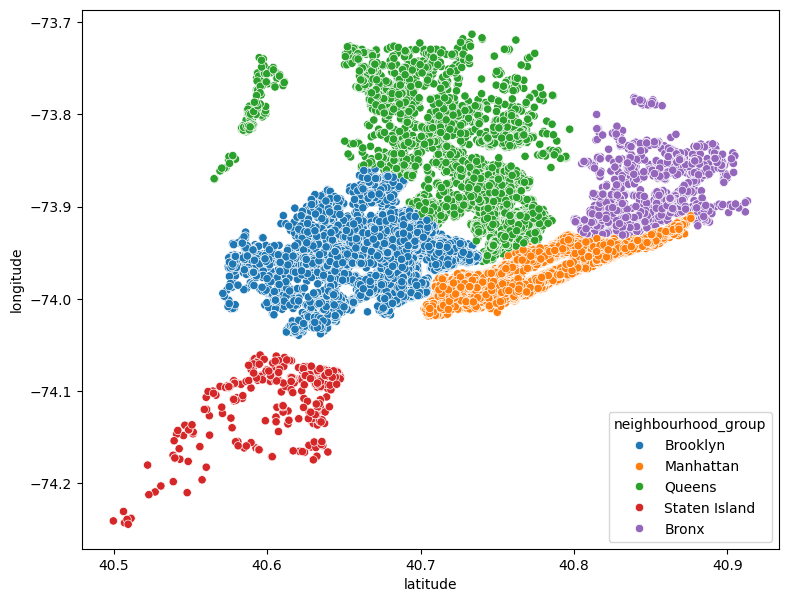

In [ ]:

#Plotting latitude and longitude in a scatterplot to have the cluster of the location
plt.figure(figsize=(9,7))
sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_group', data=airbnb_df)
plt.show()

## 2. What can we learn about different hosts and neighbourhood groups?

In [ ]:
#Grouping the host_name and neighbourhood group according to max number of host listing count and stroring into a variable
hosts_locations = airbnb_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()

#Printing the top 5 and sorting in descending order of their listing count
hosts_locations.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1833,Blueground,Brooklyn,232
1834,Blueground,Manhattan,232
7275,Kara,Manhattan,121
7479,Kazuya,Manhattan,103


* Host name **Sonder(NYC)** has the highest number of listing in **Mahattan** followed by **Blueground** in **Brooklyn**.
* Also 4 of the top 5 listings belongs to **Manhattan** neighbourhood group.

## 3. Top 10 neighbourhood groups with room type having highest room prices?

In [ ]:
#Grouping the neighbourhood group and room type according to max price and stroring into a variable
room_price_location_wise = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].max().reset_index()

#Printing the top 10 and sorting in descending order of their prices
room_price_location_wise.sort_values(by='price', ascending=False).head(10)

,neighbourhood_group,room_type,price
3,Brooklyn,Entire home/apt,10000
6,Manhattan,Entire home/apt,10000
10,Queens,Private room,10000
7,Manhattan,Private room,9999
4,Brooklyn,Private room,7500
12,Staten Island,Entire home/apt,5000
9,Queens,Entire home/apt,2600
1,Bronx,Private room,2500
11,Queens,Shared room,1800
0,Bronx,Entire home/apt,1000


We can see the overall **price** is highest in **Brooklyn** and **Manhattan** for **Entire home/apt** and in **Queens** for **Private room**.

##4. What can we learn from Room types and neighbourhood groups?

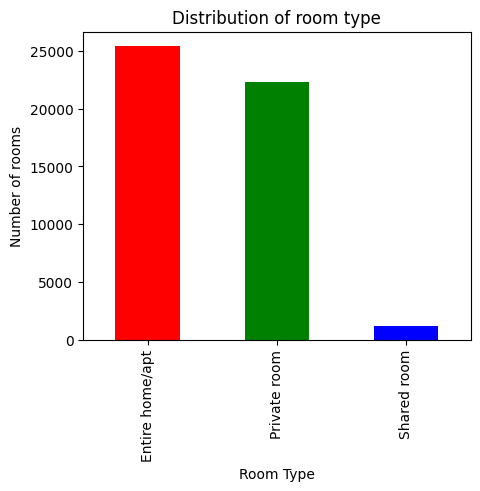

In [ ]:


#Number of rooms available in each room type
plt.figure(figsize=(5,4))
room_count = airbnb_df['room_type'].value_counts()
room_count.plot(kind='bar', color=['r','g','b'])
plt.title('Distribution of room type')
plt.xlabel('Room Type')
plt.ylabel('Number of rooms')
plt.show()

###**Top 10 Entire home/Apartment Listings**

In [ ]:
#Creating a dataframe with room type as 'Entire home/apt'
apartment = airbnb_df[airbnb_df['room_type'] == 'Entire home/apt']

#creating a list of Entire home/Apartments with all other features
list_apartment = apartment.groupby(['host_id','host_name','neighbourhood_group','neighbourhood','price']).size().reset_index(name='Count_of_apartment').sort_values(by=['Count_of_apartment'], ascending=False)

#Printing the top 10
list_apartment.head(10)

,host_id,host_name,neighbourhood_group,neighbourhood,price,Count_of_apartment
6911,7503643,Vida,Brooklyn,Greenpoint,129,20
13300,30283594,Kara,Manhattan,Hell's Kitchen,239,20
19596,120762452,Stanley,Manhattan,Murray Hill,150,18
22337,219517861,Sonder (NYC),Manhattan,Financial District,229,17
944,417504,The Box House Hotel,Brooklyn,Greenpoint,199,17
13316,30283594,Kara,Manhattan,Midtown,239,17
6912,7503643,Vida,Brooklyn,Greenpoint,149,15
19598,120762452,Stanley,Manhattan,Murray Hill,175,14
21953,205031545,Red Awning,Manhattan,Midtown,714,12
21952,205031545,Red Awning,Manhattan,Midtown,699,12


**Brooklyn** has the highest number of **Entire home/Apartments** listings followed by **Manhattan**.

###**Top 10 Private rooms**

In [ ]:
#Creating a dataframe with room type as 'Private rooms'
pvt = airbnb_df[airbnb_df['room_type'] == 'Private room']

#creating a list of private rooms with all other features
list_pvt = pvt.groupby(['host_id','host_name','neighbourhood_group','neighbourhood','price']).size().reset_index(name='Count_of_rooms').sort_values(by=['Count_of_rooms'], ascending=False)

#Printing the top 10
list_pvt.head(10)

,host_id,host_name,neighbourhood_group,neighbourhood,price,Count_of_rooms
19467,238321374,Eyal,Manhattan,Upper West Side,60,31
19280,230192510,Zach,Brooklyn,Fort Greene,48,25
19145,226410657,Nina,Brooklyn,Bedford-Stuyvesant,42,25
19069,224414117,Gabriel,Manhattan,Hell's Kitchen,199,14
19584,242962235,Yuval,Queens,Ridgewood,34,14
20043,260639745,Manhattan At Times Square,Manhattan,Theater District,100,13
6842,16677326,Alex And Zeena,Manhattan,Chelsea,85,12
18672,213781715,Anting,Brooklyn,Greenpoint,119,11
3464,5144567,Yun,Manhattan,Financial District,169,10
18761,216235179,Nina,Brooklyn,Bushwick,50,10


**Manhattan** has the highest number of **Private rooms** followed by **Brooklyn**.

###**Top 10 Shared rooms**

In [ ]:
#Creating a dataframe with room type as 'Shared room'
shared = airbnb_df[airbnb_df['room_type'] == 'Shared room']

#creating a list of shared rooms with all other features
list_shared = shared.groupby(['host_id','host_name','neighbourhood_group','neighbourhood','price']).size().reset_index(name='Count_of_rooms').sort_values(by=['Count_of_rooms'], ascending=False)

#Printing the top 10
list_shared.head(10)

,host_id,host_name,neighbourhood_group,neighbourhood,price,Count_of_rooms
388,39528519,Max,Manhattan,Lower East Side,35,13
729,175730239,Baboucarr,Queens,Sunnyside,30,10
876,248161322,Sergii,Brooklyn,Bushwick,35,7
330,30509656,Orit,Bronx,Port Morris,28,7
723,174785358,Rem,Bronx,Port Morris,28,7
386,39528519,Max,Manhattan,Lower East Side,32,6
801,209386156,Abraham,Manhattan,East Harlem,49,6
611,119669058,Melissa,Brooklyn,Bedford-Stuyvesant,36,6
786,201015598,Anchor,Brooklyn,Bedford-Stuyvesant,35,6
875,248068752,Gúney,Manhattan,Hell's Kitchen,75,5


**Manhattan** has the highest number of **Shared rooms** followed by **Queens**.

##5. Room type vs price on different neighbourhood group.

Average price per night for rooms on different neighbourhood groups

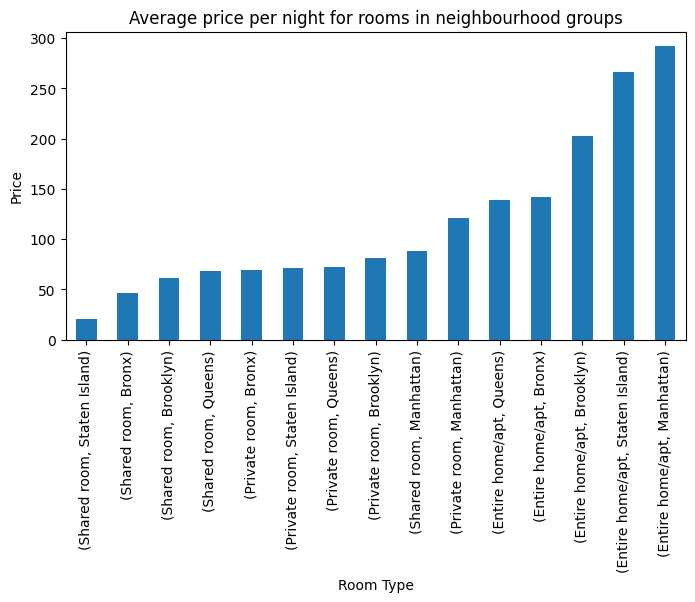

In [ ]:
#Setting figure size
plt.figure(figsize=(8,4))

#Creating a new dataframe with minimun nights equals to 1
per_night = airbnb_df[airbnb_df['minimum_nights']==1]

#Grouping room type and neighbourhood group with average price
df1 = per_night.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)

#Plotting a barplot
ax = df1.plot(kind='bar')
plt.title('Average price per night for rooms in neighbourhood groups')
plt.xlabel('Room Type')  # X label
plt.ylabel('Price')      # Y label
plt.show()

looking at the plot it is clear that
* **Shared room** in **Island** is the cheapest stay per night whereas **Entire_home/apt** in **Manhattan** is most expensive.
* With respect to room type **Bronx** is the most cheapest stay in neighbourhood groups.
* **Manhattan** is the expensive stay than any other locality in comparison of any room type.

Price for different room type in different neighbourhood group

In [ ]:
#Printing the list of average price per night based on the neighbourhood group
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

## 6. On an average how many nights people stayed in each room type?

In [ ]:
#Grouping average of minimun nights with room type and neighbourhood group
df2 = airbnb_df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].mean().sort_values( ascending=True)
df2

room_type        neighbourhood_group
Shared room      Staten Island           2.333333
                 Bronx                   3.366667
Private room     Staten Island           3.632979
                 Bronx                   3.858896
Shared room      Queens                  4.232323
Private room     Queens                  5.120107
Entire home/apt  Queens                  5.369752
Private room     Manhattan               5.446880
                 Brooklyn                5.539479
Entire home/apt  Bronx                   5.957784
                 Staten Island           6.238636
                 Brooklyn                6.531332
Shared room      Manhattan               6.766667
                 Brooklyn                7.753027
Entire home/apt  Manhattan              10.539283
Name: minimum_nights, dtype: float64

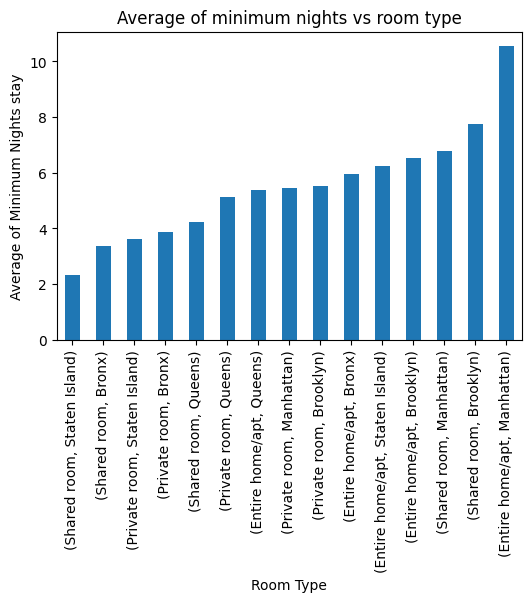

In [ ]:
#Plotting a barplot
df2.plot(kind='bar', figsize=(6,4))
plt.title('Average of minimum nights vs room type')
plt.xlabel('Room Type')
plt.ylabel('Average of Minimum Nights stay')
plt.show()

From the above plot it is clear that in **Manhattan** people prefer to live in **Entire_home/apt** with an average stay of more than 10 nights.

##7. How monthly reviews varies with room type in each neighbourhood group.

In [ ]:
#Grouping room type and neighbourhood group with average reviews per month
df3 = airbnb_df.groupby(['room_type','neighbourhood_group'])['reviews_per_month'].mean().sort_values(ascending=True)
df3

room_type        neighbourhood_group
Shared room      Staten Island          0.740000
                 Brooklyn               0.752010
Entire home/apt  Manhattan              0.862068
Shared room      Bronx                  0.968833
Private room     Brooklyn               0.990650
Entire home/apt  Brooklyn               1.125341
Private room     Manhattan              1.145254
Shared room      Queens                 1.169091
Private room     Bronx                  1.319371
Shared room      Manhattan              1.329646
Private room     Staten Island          1.437074
                 Queens                 1.548200
Entire home/apt  Queens                 1.635038
                 Staten Island          1.767955
                 Bronx                  1.824749
Name: reviews_per_month, dtype: float64

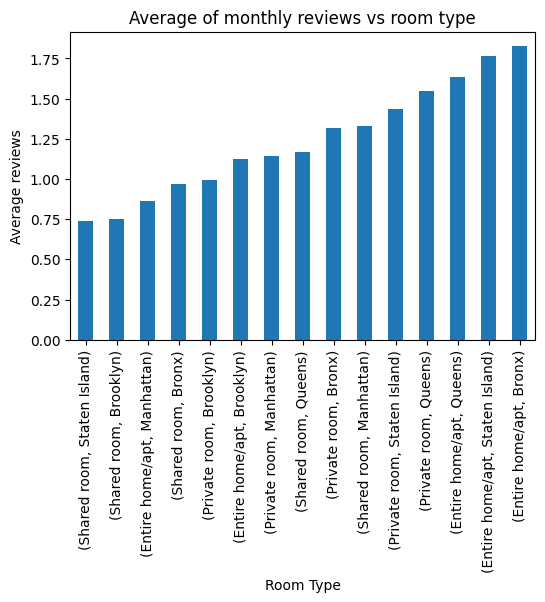

In [ ]:
#Plotting a barplot
df3.plot(kind='bar', x='room_type', y='reviews_per_month', figsize=(6,4))
plt.title('Average of monthly reviews vs room type')
plt.xlabel('Room Type')
plt.ylabel('Average reviews')
plt.show()

Above plot indicates that room type **Entire_home/apt** in **Bronx** has the highest monthly average review whereas **Shared room** in **Stalen Island** has the lowest average monthly reviews.

##8. Room types and their relation with availability in different neighbourhood group.

In [ ]:
#Grouping room type and neighbourhood group with average availability in a year
df4 = airbnb_df.groupby(['room_type','neighbourhood_group'])['availability_365'].mean().sort_values(ascending=True)
df4

room_type        neighbourhood_group
Shared room      Staten Island           64.777778
Entire home/apt  Brooklyn                97.205147
Private room     Brooklyn                99.917983
                 Manhattan              101.845026
Entire home/apt  Manhattan              117.140996
                 Queens                 132.267176
Shared room      Manhattan              138.572917
Private room     Queens                 149.222716
Shared room      Bronx                  154.216667
Entire home/apt  Bronx                  158.000000
Private room     Bronx                  171.331288
Shared room      Brooklyn               178.007264
Entire home/apt  Staten Island          178.073864
Shared room      Queens                 192.186869
Private room     Staten Island          226.361702
Name: availability_365, dtype: float64

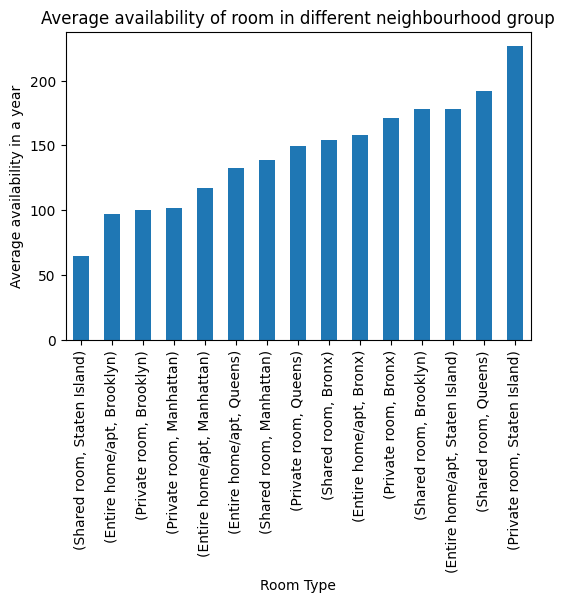

In [ ]:
#Plotting a barplot
df4.plot(kind='bar', x='room_type', y='availability_365', figsize=(6,4))
plt.title('Average availability of room in different neighbourhood group')
plt.xlabel('Room Type')
plt.ylabel('Average availability in a year')
plt.show()

Seems like **Staten Island** with room type **Private rooms** is available mostly throughout the year with an average availability of **226 days** in a year followed by **Queens** with **Shared room** type with an availability of **192 days** on an average.

##9. Top 5 Location with highest review?

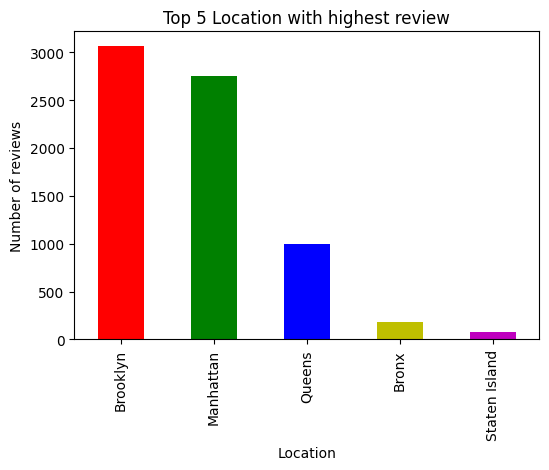

In [ ]:
#Creating a dataframe where number of reviews are 50 or more
review_50 = airbnb_df[airbnb_df['number_of_reviews']>=50]

#Grouping the neighbourhood group with highest number of reviews
df5 = review_50['neighbourhood_group'].value_counts()

#Plotting a barplot
plt.figure(figsize=(6,4))
df5.plot(kind='bar', color=['r','g','b','y','m'])
plt.title('Top 5 Location with highest review')
plt.xlabel('Location')
plt.ylabel('Number of reviews')
plt.show()

According to above plot **Brooklyn** got more reviews as compared to **Manhattan**. Also **Staten Island** which is cheaper has less reviews than the other neighbourhood group.

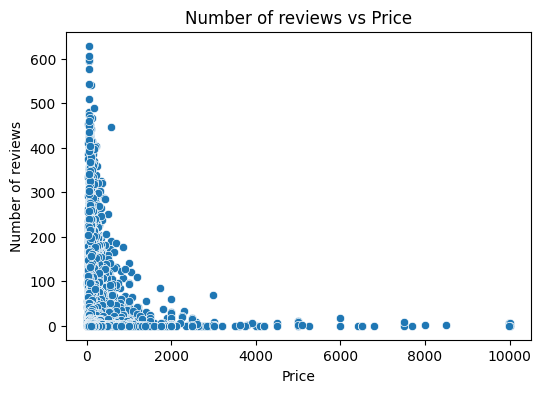

In [ ]:
#Plotting a scatterplot with x axis as price and y axis as number of reviews
plt.figure(figsize=(6,4))
sns.scatterplot(x='price', y='number_of_reviews', data=airbnb_df)
plt.title('Number of reviews vs Price')
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.show()

From the above scatterplot it is clear that most number of people are likely to stay in less expensive area and their reviews in those are higher.

##10. Top 5 hosts?

<Axes: xlabel='host_name'>

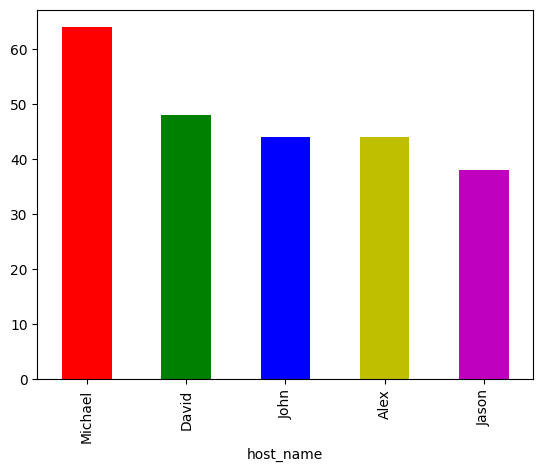

In [ ]:
#Grouping host name with highest number of reviews and plotting a barplot
review_50['host_name'].value_counts()[:5].plot(kind='bar', color=['r','g','b','y','m'])

**Michael** has received most reviews topping the chart.

##11. What is the Correlation between different variables?

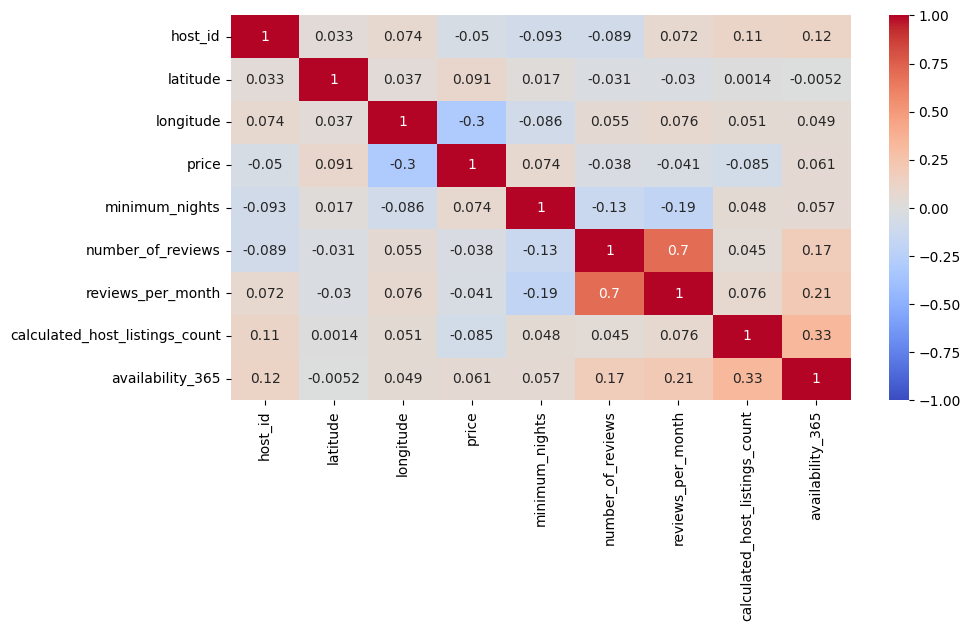

In [ ]:
#Selecting only numeric columns from Airbnb DataFrame
numeric_df = airbnb_df.select_dtypes(include='number')

# Computing the correlation matrix using the Kendall method
corr = numeric_df.corr(method='kendall')

# Plotting the heatmap
fig = plt.figure(figsize=(10, 5))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)

# Showing the plot
plt.show()

## Conclusion


* We found that host name **Sonder(NYC)** has the highest number of listings in **Manhattan** followed by **Blueground** in **Brooklyn**.
* **Entire_home/apt** is the highest number of room types and overall prices are higher in **Manhattan** and **Brooklyn** for **Entire_home/apt**.
* **Shared room** in **Island** is the cheapest stay per night whereas **Entire_home/apt** in **Manhattan** is most expensive. With respect to room type **Bronx** is the overall most cheapest stay in neighbourhood groups and **Manhattan** is the expensive stay than any other locality in comparison of any room type.
* People are preferring to stay in **Entire_home/apt** and **Private rooms** in **Manhattan**, **Brooklyn** and **Queens**. Also visitors preferring to stay in rooms which have less listing price.
* in **Manhattan** people prefer to live in **Entire_home/apt** with an average stay of more than 10 nights but **Entire_home/apt** in **Bronx** has the highest monthly average review whereas **Shared room** in **Stalen Island** has the lowest average monthly reviews.
* **Staten Island** with room type **Private rooms** is available mostly throughout the year with an average availability of **226 days** in a year followed by **Queens** with **Shared room** type with an availability of **192 days** on an average whereas **Shared room** in **Staten Island** and **Entire_home/apt** in **Brooklyn** are the busiest.
* We found the top 5 hosts are Michael, David, John, Alex, and Jason.